In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

import project_functions_5 as pf

In [2]:
root_dir = 'D:/OpenClassrooms/projet_5'

In [3]:
# for bigger plots
scale_factor = 2

default_size = [6.0, 4.0]
scaled_size = [scale_factor * n for n in default_size]
plt.rcParams['figure.figsize'] = scaled_size


# to see all columns when looking at a dataframe
pd.set_option('display.max_columns', None)

In [4]:
# all datasets in the order they appear on Kaggle

df_name_1 = 'olist_customers_dataset'
df_name_2 = 'olist_geolocation_dataset'
df_name_3 = 'olist_order_items_dataset'
df_name_4 = 'olist_order_payments_dataset'
df_name_5 = 'olist_order_reviews_dataset'
df_name_6 = 'olist_orders_dataset'
df_name_7 = ''
df_name_8 = ''
df_name_9 = ''

In [5]:
# load data

df_1 = pd.read_csv(root_dir + '/data/' + df_name_1 + '.csv')
print('1:', df_1.shape)

df_2 = pd.read_csv(root_dir + '/data/' + df_name_2 + '.csv')
print('2:', df_2.shape)

df_3 = pd.read_csv(root_dir + '/data/' + df_name_3 + '.csv')
print('3:', df_3.shape)

df_4 = pd.read_csv(root_dir + '/data/' + df_name_4 + '.csv')
print('4:', df_4.shape)

df_5 = pd.read_csv(root_dir + '/data/' + df_name_5 + '.csv')
print('5:', df_5.shape)

df_6 = pd.read_csv(root_dir + '/data/' + df_name_6 + '.csv')
print('6:', df_6.shape)

1: (99441, 5)
2: (1000163, 5)
3: (112650, 7)
4: (103886, 5)
5: (99224, 7)
6: (99441, 8)


# df_1

In [6]:
print(df_1.shape)
df_1.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
df_1.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
# rename for later merge
df_1 = df_1.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'})

In [9]:
df_1.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# df_2

In [10]:
print(df_2.shape)
df_2.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
df_2.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [12]:
# rename for later merge
df_2 = df_2.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'})

In [13]:
df_2['zip_code_prefix'].value_counts()

24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
71750       1
71742       1
26475       1
26357       1
29826       1
Name: zip_code_prefix, Length: 19015, dtype: int64

In [14]:
df_2[['geolocation_lat', 'geolocation_lng']].value_counts()

geolocation_lat  geolocation_lng
-27.102099       -48.629613         314
-23.495901       -46.874687         190
-23.506049       -46.717377         141
-23.490618       -46.869004         127
-23.005514       -43.375964         102
                                   ... 
-23.466505       -46.648624           1
-23.466497       -46.424012           1
-23.466492       -46.825641           1
-23.466486       -46.571010           1
 45.065933        9.341528            1
Length: 718463, dtype: int64

In [15]:
# get all unique locations
to_keep = ['zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
geo_df = df_2[to_keep]
geo_df = geo_df[~geo_df[['geolocation_lat', 'geolocation_lng']].duplicated()]

In [16]:
# find mean lat & lng for a zip_code_prefix
geo_group = geo_df.groupby('zip_code_prefix', as_index=False)
geo_group = geo_group.agg(np.mean)

print(geo_group.shape)
geo_group.head()

(18940, 3)


,zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550271,-46.634047
1,1002,-23.547657,-46.634991
2,1003,-23.548991,-46.635653
3,1004,-23.549829,-46.634792
4,1005,-23.549487,-46.636650


# df_3

In [17]:
print(df_3.shape)
df_3.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
df_3.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
df_3['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

In [20]:
# multiply 'freight_value' by the number of items
# (on the Kaggle page, it is said that freight = freight_total / nb_items)
order_items = df_3[['order_id', 'price', 'freight_value', 'order_item_id']]
print(order_items.loc[14], '\n')

total_freight_value = order_items['freight_value'] * order_items['order_item_id']
order_items['freight_value'] = total_freight_value
print(order_items.loc[14])

order_items = order_items.drop('order_item_id', axis=1)

order_id         0008288aa423d2a3f00fcb17cd7d8719
price                                        49.9
freight_value                               13.37
order_item_id                                   2
Name: 14, dtype: object 

order_id         0008288aa423d2a3f00fcb17cd7d8719
price                                        49.9
freight_value                               26.74
order_item_id                                   2
Name: 14, dtype: object


C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
# group price and freight value per order
order_group = order_items.groupby('order_id', as_index=False)
order_group = order_group.agg(np.sum)

print(order_group.shape)
order_group.head()

(98666, 3)


,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


# df_4

In [22]:
print( df_4.shape)
df_4.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [23]:
df_4['order_id'].duplicated().sum()

4446

In [24]:
df_4[df_4['order_id'].duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [25]:
# a same order can separated in multiple rows
df_4[df_4['order_id']=='e6a66a8350bb88497954d37688ab123e']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
826,e6a66a8350bb88497954d37688ab123e,4,voucher,1,8.24
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
16289,e6a66a8350bb88497954d37688ab123e,6,voucher,1,17.30
39743,e6a66a8350bb88497954d37688ab123e,1,voucher,1,4.95
42000,e6a66a8350bb88497954d37688ab123e,3,voucher,1,5.75
45326,e6a66a8350bb88497954d37688ab123e,7,voucher,1,16.11
71825,e6a66a8350bb88497954d37688ab123e,5,voucher,1,19.16
96318,e6a66a8350bb88497954d37688ab123e,8,voucher,1,9.83


In [26]:
# solution to have only one row per order: one-hot encoding
pd.get_dummies(df_4['payment_type'])

,boleto,credit_card,debit_card,not_defined,voucher
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
103881,1,0,0,0,0
103882,0,1,0,0,0
103883,0,1,0,0,0
103884,0,1,0,0,0


In [27]:
# replace original column by one-hot columns
column = 'payment_type'

one_hot = pd.get_dummies(df_4[column], prefix='pay')
test = pd.concat([df_4, one_hot], axis=1)
test = test.drop(column, axis=1)

In [28]:
print(test.shape)
test.head()

(103886, 9)


,order_id,payment_sequential,payment_installments,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_not_defined,pay_voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,0,1,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,24.39,0,1,0,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,65.71,0,1,0,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,8,107.78,0,1,0,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,2,128.45,0,1,0,0,0


In [29]:
test['pay_not_defined'].value_counts()

# remove 'not_defined' payment
test = test.drop('pay_not_defined', axis=1)

In [30]:
test_group = test.groupby('order_id', as_index=False)
test_agg = test_group.agg(np.sum)
print(test_agg.shape)

(99440, 8)


In [31]:
# result of one-hot encoding
test_agg[test_agg['order_id']=='e6a66a8350bb88497954d37688ab123e']

,order_id,payment_sequential,payment_installments,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
89713,e6a66a8350bb88497954d37688ab123e,36,8,91.85,0,0,0,8


In [32]:
df_4 = test_agg
print(df_4.shape)
df_4.head()

(99440, 8)


,order_id,payment_sequential,payment_installments,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19,0,1,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,3,259.83,0,1,0,0
2,000229ec398224ef6ca0657da4fc703e,1,5,216.87,0,1,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,2,25.78,0,1,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3,218.04,0,1,0,0


# df_5

In [33]:
print(df_5.shape)
df_5.head()

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [34]:
df_5.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [35]:
# dates

In [36]:
date_format = '%Y-%m-%d %H:%M:%S'

date_columns = ['review_creation_date', 
                'review_answer_timestamp']

In [37]:
def format_date(date_str, date_format):
    return datetime.strptime(date_str, date_format)

for column in date_columns:
    df_5[column] = df_5[column].apply(format_date, args=[date_format])
df_5[date_columns].head()

,review_creation_date,review_answer_timestamp
0,2018-01-18,2018-01-18 21:46:59
1,2018-03-10,2018-03-11 03:05:13
2,2018-02-17,2018-02-18 14:36:24
3,2017-04-21,2017-04-21 22:02:06
4,2018-03-01,2018-03-02 10:26:53


In [38]:
# new column: response time (in days)
def nb_days(date):
    return date.days


df_5['nb_days_survey_respond'] = df_5['review_answer_timestamp'] - df_5['review_creation_date']
print(df_5['nb_days_survey_respond'][0])
df_5['nb_days_survey_respond'] = df_5['nb_days_survey_respond'].apply(nb_days)
print(df_5['nb_days_survey_respond'][0])

0 days 21:46:59
0


In [39]:
# drop old columns
df_5 = df_5.drop(date_columns, axis=1)
print(df_5.shape)
df_5.head()

(99224, 6)


,review_id,order_id,review_score,review_comment_title,review_comment_message,nb_days_survey_respond
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,1


In [40]:
# 'order_id' vs 'review_id' 
# (I prioritize 'order_id' because it links to the other dataframes)

print(df_5.duplicated().sum())
print(df_5['order_id'].duplicated().sum())
print(df_5['review_id'].duplicated().sum())
print(df_5[['review_id', 'order_id']].duplicated().sum())

0
551
814
0


In [41]:
df_5 = df_5.drop_duplicates(subset=['order_id'], keep='last')

print(df_5.shape)
df_5.isna().sum()

(98673, 6)


review_id                     0
order_id                      0
review_score                  0
review_comment_title      87122
review_comment_message    57890
nb_days_survey_respond        0
dtype: int64

In [42]:
# transform review to 'has the customer left a review (1) or not (0) ?'
columns = ['review_comment_title', 
           'review_comment_message']

review_columns = {'review_comment_title': 'review_title',
                  'review_comment_message': 'review_message'}

for column in columns:
    mask = df_5[column].isna()
    df_5.loc[mask, column] = 0
    df_5.loc[~mask, column] = 1

df_5 = df_5.rename(columns=review_columns)

In [43]:
df_5 = df_5.drop('review_id', axis=1)

In [44]:
print(df_5.shape)
df_5.head()

(98673, 5)


,order_id,review_score,review_title,review_message,nb_days_survey_respond
0,73fc7af87114b39712e6da79b0a377eb,4,0,0,0
1,a548910a1c6147796b98fdf73dbeba33,5,0,0,1
2,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,1
3,658677c97b385a9be170737859d3511b,5,0,1,0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,1,1


# df_6

In [45]:
print(df_6.shape)
df_6.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [46]:
# only use orders that have been delivered & drop nans
print(df_6[df_6['order_status'] == 'delivered'].shape, '\n')
df_6 = df_6[df_6['order_status'] == 'delivered']
df_6 = df_6.drop('order_status', axis=1)

print(df_6.isna().sum(), '\n')
df_6 = df_6.dropna()

print(df_6.shape)
df_6.head()

(96478, 8) 

order_id                          0
customer_id                       0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64 

(96455, 7)


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [47]:
t1 = datetime.now()

In [48]:
t2 = datetime.now()

In [49]:
dif = t2-t1
print(type(dif))
print(dif)
print(dif.days)

<class 'datetime.timedelta'>
0:00:00.084678
0


In [50]:
# find how the dates are formated

date = df_6['order_purchase_timestamp'][0]
print(date, '\t', type(date), '\n')

date_format = '%Y-%m-%d %H:%M:%S'
date_correct = datetime.strptime(date, date_format)
print(date_correct, '\t', type(date_correct))

2017-10-02 10:56:33 	 <class 'str'> 

2017-10-02 10:56:33 	 <class 'datetime.datetime'>


In [51]:
(t2-date_correct)

datetime.timedelta(days=1732, seconds=29882, microseconds=500573)

In [52]:
def format_date(date_str, date_format):
    return datetime.strptime(date_str, date_format)


date_columns = ['order_purchase_timestamp', 
                'order_approved_at', 
                'order_delivered_carrier_date',
                'order_delivered_customer_date', 
                'order_estimated_delivery_date']

for column in date_columns:
    df_6[column] = df_6[column].apply(format_date, args=[date_format])
df_6['order_purchase_timestamp'].head()

0   2017-10-02 10:56:33
1   2018-07-24 20:41:37
2   2018-08-08 08:38:49
3   2017-11-18 19:28:06
4   2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [53]:
print(df_6.shape)
df_6.head()

(96455, 7)


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [54]:
# convert date columns to "time since order_purchase_timestamp" columns
reference_column = 'order_purchase_timestamp'

relative_time_columns = ['order_approved_at', 
                         'order_delivered_carrier_date', 
                         'order_delivered_customer_date',  
                         'order_estimated_delivery_date'
                        ]

for column in relative_time_columns:
    df_6[column] = df_6[column] - df_6[reference_column]

In [55]:
# convert order_purchase_timestamp dates to "time since first order"
reference_date = min(df_6['order_purchase_timestamp'])
print(reference_date)

df_6['order_purchase_timestamp'] = df_6['order_purchase_timestamp'] - reference_date

df_6.head()

2016-09-15 12:16:38


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,381 days 22:39:55,0 days 00:10:42,2 days 08:58:27,8 days 10:28:40,15 days 13:03:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,677 days 08:24:59,1 days 06:42:50,1 days 17:49:23,13 days 18:46:08,19 days 03:18:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,691 days 20:22:11,0 days 00:16:34,0 days 05:11:11,9 days 09:27:40,26 days 15:21:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,429 days 07:11:28,0 days 00:17:53,3 days 18:11:53,13 days 05:00:36,26 days 04:31:54
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,516 days 09:02:01,0 days 01:01:50,0 days 22:27:55,2 days 20:58:23,12 days 02:41:21


In [56]:
# convert time columns to number of days

def nb_days(date):
    return date.days


time_columns = {'order_purchase_timestamp': 'order_day', 
                'order_approved_at': 'nb_days_order_approved', 
                'order_delivered_carrier_date': 'nb_days_delivered_carrier', 
                'order_delivered_customer_date': 'nb_days_delivered_customer', 
                'order_estimated_delivery_date': 'nb_days_estimate_delivery'
               }

for column in time_columns.keys():
    df_6[column] = df_6[column].apply(nb_days)

df_6 = df_6.rename(columns=time_columns)

In [57]:
# df_6 final
print(df_6.shape)
df_6.head()

(96455, 7)


,order_id,customer_id,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,381,0,2,8,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,677,1,1,13,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,691,0,0,9,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,429,0,3,13,26
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,516,0,0,2,12


In [58]:
print(df_6['order_day'].min())
print(df_6['order_day'].max())

0
713


### df_3 + df_6

In [59]:
test = pd.merge(df_6, order_group, on='order_id', how='inner')

print(test.shape)
test.head()

(96455, 9)


,order_id,customer_id,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,381,0,2,8,15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,677,1,1,13,19,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,691,0,0,9,26,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,429,0,3,13,26,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,516,0,0,2,12,19.90,8.72


### df_4 + df_6

In [60]:
print('4:', df_4.shape)
print('6:', df_6.shape)

4: (99440, 8)
6: (96455, 7)


In [61]:
print('4:', df_4['order_id'].duplicated().sum())
print('6:', df_6['order_id'].duplicated().sum())

4: 0
6: 0


In [62]:
test = pd.merge(df_4, df_6, on='order_id', how='inner')
print(test.shape)

(96454, 14)


In [63]:
test.head()

,order_id,payment_sequential,payment_installments,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,customer_id,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19,0,1,0,0,3ce436f183e68e07877b285a838db11a,362,0,6,7,15
1,00018f77f2f0320c557190d7a144bdd3,1,3,259.83,0,1,0,0,f6dd3ec061db4e3987629fe6b26e5cce,222,0,8,16,18
2,000229ec398224ef6ca0657da4fc703e,1,5,216.87,0,1,0,0,6489ae5e4333f3693df5ad4372dab6d3,486,0,1,7,21
3,00024acbcdf0a6daa1e931b038114c75,1,2,25.78,0,1,0,0,d4eb9395c8c0431ee92fce09860c5a06,691,0,2,6,11
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3,218.04,0,1,0,0,58dbd0b2d70206bf40e62cd34e84d795,142,0,11,25,40


### df_5 + df_6

In [64]:
print('5:', df_5.shape)
print('6:', df_6.shape)

5: (98673, 5)
6: (96455, 7)


In [65]:
print('5:', df_5['order_id'].duplicated().sum())
print('6:', df_6['order_id'].duplicated().sum())

5: 0
6: 0


In [66]:
test = pd.merge(df_5, df_6, on='order_id', how='right')
print(test.shape)
test.isna().sum()

(96455, 11)


order_id                        0
review_score                  646
review_title                  646
review_message                646
nb_days_survey_respond        646
customer_id                     0
order_day                       0
nb_days_order_approved          0
nb_days_delivered_carrier       0
nb_days_delivered_customer      0
nb_days_estimate_delivery       0
dtype: int64

In [67]:
test = pd.merge(df_6, df_5, on='order_id', how='inner')
print(test.shape)
test.isna().sum()

(95809, 11)


order_id                      0
customer_id                   0
order_day                     0
nb_days_order_approved        0
nb_days_delivered_carrier     0
nb_days_delivered_customer    0
nb_days_estimate_delivery     0
review_score                  0
review_title                  0
review_message                0
nb_days_survey_respond        0
dtype: int64

In [68]:
test.head()

,order_id,customer_id,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,review_score,review_title,review_message,nb_days_survey_respond
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,381,0,2,8,15,4,0,1,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,677,1,1,13,19,4,1,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,691,0,0,9,26,5,0,0,4
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,429,0,3,13,26,5,0,1,2
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,516,0,0,2,12,5,0,0,1


# customers
### df_1 + df_2

In [69]:
customers = pd.merge(df_1, geo_group, on='zip_code_prefix', how='inner')

print(customers.shape)
customers.head()

(99139, 7)


,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.499273,-47.396658
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.499273,-47.396658
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.499273,-47.396658
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.499273,-47.396658
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.499273,-47.396658


# orders
### df_3 + df_4 + df_5 + df_6

In [70]:
orders = pd.merge(df_6, order_group, on='order_id', how='inner')
orders = pd.merge(orders, df_4, on='order_id', how='inner')
print(orders.shape)
orders.head()

(96454, 16)


,order_id,customer_id,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,price,freight_value,payment_sequential,payment_installments,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,381,0,2,8,15,29.99,8.72,6,3,38.71,0,1,0,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,677,1,1,13,19,118.70,22.76,1,1,141.46,1,0,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,691,0,0,9,26,159.90,19.22,1,3,179.12,0,1,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,429,0,3,13,26,45.00,27.20,1,1,72.20,0,1,0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,516,0,0,2,12,19.90,8.72,1,1,28.62,0,1,0,0


In [71]:
# final one
orders = pd.merge(df_6, order_group, on='order_id', how='inner')
orders = pd.merge(orders, df_4, on='order_id', how='inner')
orders = pd.merge(orders, df_5, on='order_id', how='inner')
print(orders.shape)
orders.head()

(95808, 20)


,order_id,customer_id,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,price,freight_value,payment_sequential,payment_installments,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,review_score,review_title,review_message,nb_days_survey_respond
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,381,0,2,8,15,29.99,8.72,6,3,38.71,0,1,0,2,4,0,1,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,677,1,1,13,19,118.70,22.76,1,1,141.46,1,0,0,0,4,1,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,691,0,0,9,26,159.90,19.22,1,3,179.12,0,1,0,0,5,0,0,4
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,429,0,3,13,26,45.00,27.20,1,1,72.20,0,1,0,0,5,0,1,2
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,516,0,0,2,12,19.90,8.72,1,1,28.62,0,1,0,0,5,0,0,1


# final df
### customers + orders

In [72]:
df_combined = pd.merge(customers, orders, on='customer_id', how='inner')

# keep customer_unique_id and remove other id
df_combined = df_combined.drop(['customer_id', 'order_id'], axis=1)

print(df_combined.shape)
df_combined.head()

(95522, 24)


,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,price,freight_value,payment_sequential,payment_installments,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,review_score,review_title,review_message,nb_days_survey_respond
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.499273,-47.396658,243,0,6,8,19,124.99,21.88,1,2,146.87,0,1,0,0,4,0,0,4
1,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.499273,-47.396658,638,0,2,5,19,79.90,14.87,1,8,94.77,0,1,0,0,5,1,0,4
2,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.499273,-47.396658,359,0,1,9,22,44.90,17.60,1,1,62.50,0,1,0,0,5,0,0,1
3,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.499273,-47.396658,556,0,0,2,16,19.90,12.79,1,3,32.69,0,1,0,0,5,0,0,13
4,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.499273,-47.396658,682,0,1,4,10,63.90,13.11,1,1,77.01,0,1,0,0,5,0,0,0


In [73]:
# group by unique customer
customer_group = df_combined.groupby('customer_unique_id', as_index=False)
customer_group.head()

,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,price,freight_value,payment_sequential,payment_installments,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,review_score,review_title,review_message,nb_days_survey_respond
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.499273,-47.396658,243,0,6,8,19,124.99,21.88,1,2,146.87,0,1,0,0,4,0,0,4
1,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.499273,-47.396658,638,0,2,5,19,79.90,14.87,1,8,94.77,0,1,0,0,5,1,0,4
2,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.499273,-47.396658,359,0,1,9,22,44.90,17.60,1,1,62.50,0,1,0,0,5,0,0,1
3,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.499273,-47.396658,556,0,0,2,16,19.90,12.79,1,3,32.69,0,1,0,0,5,0,0,13
4,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.499273,-47.396658,682,0,1,4,10,63.90,13.11,1,1,77.01,0,1,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95517,8c8173e547e020f411aa55b2fceed861,87145,paicandu,PR,-23.501806,-52.150926,320,0,1,14,21,59.90,17.67,1,1,77.57,1,0,0,0,5,0,1,0
95518,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,-28.527713,-54.146075,614,1,2,14,14,97.00,14.76,1,1,111.76,1,0,0,0,5,0,0,4
95519,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,-23.588483,-46.737908,559,0,1,13,18,61.80,13.79,1,3,75.59,0,1,0,0,5,0,1,0
95520,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.822773,-49.250608,496,0,5,26,25,120.00,39.77,1,3,159.77,0,1,0,0,5,0,0,0


In [74]:
# only for testing
#df_combined.drop(agg_columns.keys(), axis=1).head()

In [75]:
# columns that can be aggregated

agg_columns = {'price': np.sum, 
               'freight_value': np.sum, 
               'order_day': np.max, 
               'nb_days_order_approved': np.median, 
               'nb_days_delivered_carrier': np.median, 
               'nb_days_delivered_customer': np.median, 
               'nb_days_estimate_delivery': np.median, 
               
               'payment_sequential': np.median,
               'payment_installments': np.median,
               'pay_boleto': np.sum, 
               'pay_credit_card': np.sum, 
               'pay_debit_card': np.sum, 
               'pay_voucher': np.sum, 
               'payment_value': np.sum, 
               
               'review_score': np.mean, 
               'review_title': np.max, 
               'review_message': np.max, 
               'nb_days_survey_respond': np.median
              }

customer_agg = customer_group.agg(agg_columns)
print(customer_agg.shape)
customer_agg.head()

(92456, 19)


,customer_unique_id,price,freight_value,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,601,0.0,1.0,6.0,10.0,1.0,8.0,0,1,0,0,141.90,5.0,1,1,4.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,598,0.0,2.0,3.0,7.0,1.0,1.0,0,1,0,0,27.19,4.0,0,0,0.0
2,0000f46a3911fa3c0805444483337064,69.00,17.22,176,0.0,2.0,25.0,27.0,1.0,8.0,0,1,0,0,86.22,3.0,0,0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,392,0.0,0.0,20.0,31.0,1.0,4.0,0,1,0,0,43.62,4.0,0,1,1.0
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,425,0.0,2.0,13.0,20.0,1.0,6.0,0,1,0,0,196.89,5.0,0,0,4.0


In [76]:
# columns that cannot be aggregated (will be set on the last known value)
columns_left = list(df_combined.columns)
to_drop = list(agg_columns.keys()) + ['customer_unique_id']
for column in to_drop:
    columns_left.remove(column)

for column in columns_left:
    print(column)

zip_code_prefix
customer_city
customer_state
geolocation_lat
geolocation_lng


In [77]:
# prepare df_final
df_final = customer_agg
for column in columns_left:
    df_final[column] = np.nan


# fininsh df_final
for group in customer_group:
    cust_id = group[0]
    df = group[1]
    last_order_day = max(df['order_day'])
    last_order = df[df['order_day'] == last_order_day].reset_index().loc[0]    
    last_order = last_order.drop(to_drop + ['index'])
    
    mask = df_final['customer_unique_id']==cust_id
    df_final.loc[mask, last_order.keys()] = last_order.values


print(df_final.shape)
df_final.head()

(92456, 24)


,customer_unique_id,price,freight_value,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,601,0.0,1.0,6.0,10.0,1.0,8.0,0,1,0,0,141.90,5.0,1,1,4.0,7787.0,cajamar,SP,-23.340262,-46.831085
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,598,0.0,2.0,3.0,7.0,1.0,1.0,0,1,0,0,27.19,4.0,0,0,0.0,6053.0,osasco,SP,-23.559044,-46.788516
2,0000f46a3911fa3c0805444483337064,69.00,17.22,176,0.0,2.0,25.0,27.0,1.0,8.0,0,1,0,0,86.22,3.0,0,0,1.0,88115.0,sao jose,SC,-27.542763,-48.635001
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,392,0.0,0.0,20.0,31.0,1.0,4.0,0,1,0,0,43.62,4.0,0,1,1.0,66812.0,belem,PA,-1.312726,-48.482748
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,425,0.0,2.0,13.0,20.0,1.0,6.0,0,1,0,0,196.89,5.0,0,0,4.0,18040.0,sorocaba,SP,-23.505670,-47.469837


In [78]:
# add F (number of purchases)
df_final = pd.merge(df_final, customer_group.size(), 
                         on='customer_unique_id', 
                         how='left')

print(df_final.shape)
df_final.head()

(92456, 25)


,customer_unique_id,price,freight_value,order_day,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,size
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,601,0.0,1.0,6.0,10.0,1.0,8.0,0,1,0,0,141.90,5.0,1,1,4.0,7787.0,cajamar,SP,-23.340262,-46.831085,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,598,0.0,2.0,3.0,7.0,1.0,1.0,0,1,0,0,27.19,4.0,0,0,0.0,6053.0,osasco,SP,-23.559044,-46.788516,1
2,0000f46a3911fa3c0805444483337064,69.00,17.22,176,0.0,2.0,25.0,27.0,1.0,8.0,0,1,0,0,86.22,3.0,0,0,1.0,88115.0,sao jose,SC,-27.542763,-48.635001,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,392,0.0,0.0,20.0,31.0,1.0,4.0,0,1,0,0,43.62,4.0,0,1,1.0,66812.0,belem,PA,-1.312726,-48.482748,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,425,0.0,2.0,13.0,20.0,1.0,6.0,0,1,0,0,196.89,5.0,0,0,4.0,18040.0,sorocaba,SP,-23.505670,-47.469837,1


In [79]:
df_final.isna().sum()

customer_unique_id            0
price                         0
freight_value                 0
order_day                     0
nb_days_order_approved        0
nb_days_delivered_carrier     0
nb_days_delivered_customer    0
nb_days_estimate_delivery     0
payment_sequential            0
payment_installments          0
pay_boleto                    0
pay_credit_card               0
pay_debit_card                0
pay_voucher                   0
payment_value                 0
review_score                  0
review_title                  0
review_message                0
nb_days_survey_respond        0
zip_code_prefix               0
customer_city                 0
customer_state                0
geolocation_lat               0
geolocation_lng               0
size                          0
dtype: int64

In [80]:
# rename RFM columns
df_final = df_final.rename(columns={'order_day': 'R', 
                                    'size': 'F', 
                                    'price': 'M'
                                   })

In [81]:
# choose to save the dataframes or not
save_final_df = False
df_final_save_name = 'df_final_5'

if save_final_df:
    df_save_path = root_dir + '/data/' + df_final_save_name + '.csv'
    df_final.to_csv(df_save_path, index=False)

# Data exploration

In [59]:
# load back data
dataset_name = 'df_final_4'

data_path = root_dir + '/data/' + dataset_name + '.csv'
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(92456, 25)


,customer_unique_id,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,F
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,601,0.0,1.0,6.0,10.0,1.0,8.0,0,1,0,0,141.90,5.0,1,1,4.0,7787.0,cajamar,SP,-23.340262,-46.831085,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,598,0.0,2.0,3.0,7.0,1.0,1.0,0,1,0,0,27.19,4.0,0,0,0.0,6053.0,osasco,SP,-23.559044,-46.788516,1
2,0000f46a3911fa3c0805444483337064,69.00,17.22,176,0.0,2.0,25.0,27.0,1.0,8.0,0,1,0,0,86.22,3.0,0,0,1.0,88115.0,sao jose,SC,-27.542763,-48.635001,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,392,0.0,0.0,20.0,31.0,1.0,4.0,0,1,0,0,43.62,4.0,0,1,1.0,66812.0,belem,PA,-1.312726,-48.482748,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,425,0.0,2.0,13.0,20.0,1.0,6.0,0,1,0,0,196.89,5.0,0,0,4.0,18040.0,sorocaba,SP,-23.505670,-47.469837,1


In [60]:
df.describe(include='all')

,customer_unique_id,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,F
count,92456,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456.000000,92456,92456,92456.000000,92456.000000,92456.000000
unique,92456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4039,27,NaN,NaN,NaN
top,0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14419,38902,NaN,NaN,NaN
mean,NaN,141.339982,27.752340,475.388271,0.264163,2.724583,12.051516,23.345072,1.134480,2.963383,0.205395,0.798834,0.015975,0.058828,164.884416,4.153394,0.119062,0.409654,2.583007,35171.287737,NaN,NaN,-21.193371,-46.192054,1.033162
std,NaN,214.490340,54.513022,152.578419,0.726909,3.574142,9.461845,8.711739,2.368528,2.715094,0.417941,0.472985,0.126753,0.434132,225.070074,1.280710,0.323863,0.491773,9.780711,29844.226250,NaN,NaN,5.612580,4.058764,0.208425
min,NaN,0.850000,0.000000,18.000000,0.000000,-172.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.590000,1.000000,0.000000,0.000000,0.000000,1003.000000,NaN,NaN,-33.689824,-80.201776,1.000000
25%,NaN,47.650000,14.060000,367.000000,0.000000,1.000000,6.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,63.000000,4.000000,0.000000,0.000000,1.000000,11350.000000,NaN,NaN,-23.590170,-48.126849,1.000000
50%,NaN,89.700000,17.630000,494.000000,0.000000,2.000000,10.000000,23.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,107.780000,5.000000,0.000000,0.000000,1.000000,24422.000000,NaN,NaN,-22.924079,-46.633141,1.000000
75%,NaN,153.800000,26.250000,599.000000,0.000000,4.000000,15.000000,28.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,182.112500,5.000000,0.000000,1.000000,3.000000,58900.000000,NaN,NaN,-20.138731,-43.629604,1.000000


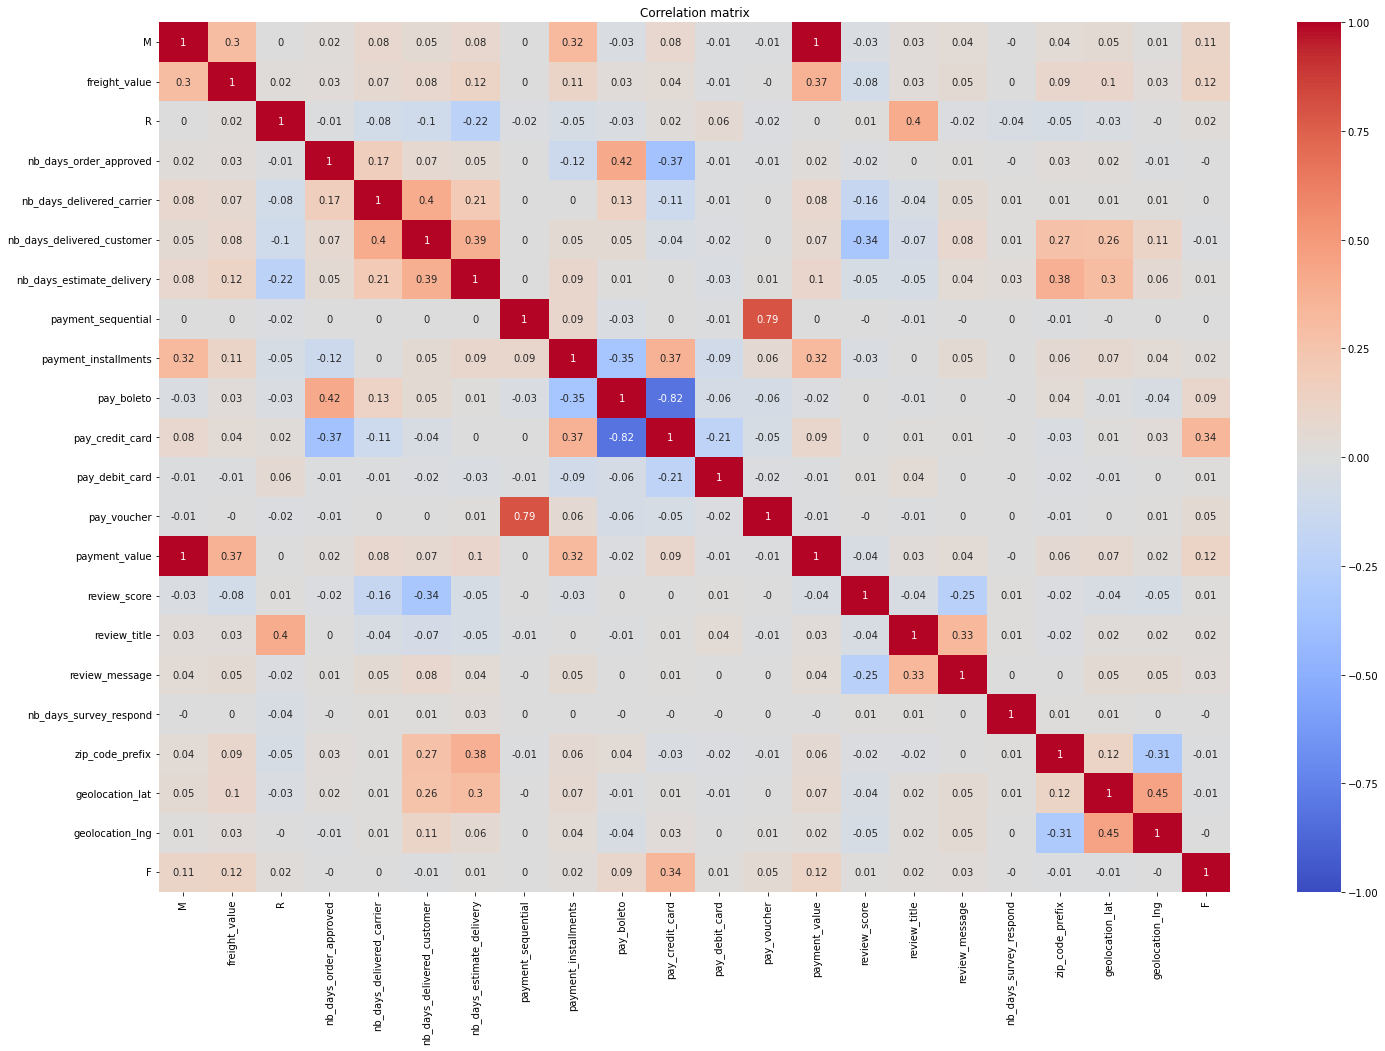

In [61]:
corr_matrix = df.corr().round(2)

temp_scale = 2
temp_size = [temp_scale * n for n in plt.rcParams['figure.figsize']]

plt.figure(figsize=temp_size)
plt.title('Correlation matrix')
sns.heatmap(corr_matrix, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            annot = True)
plt.show()

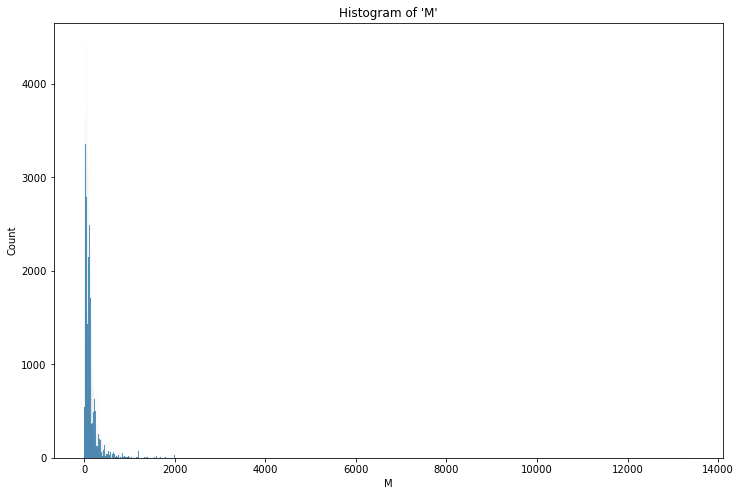

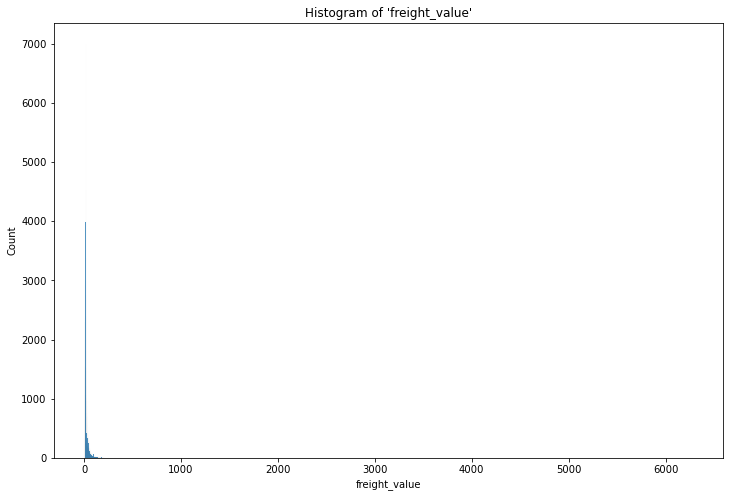

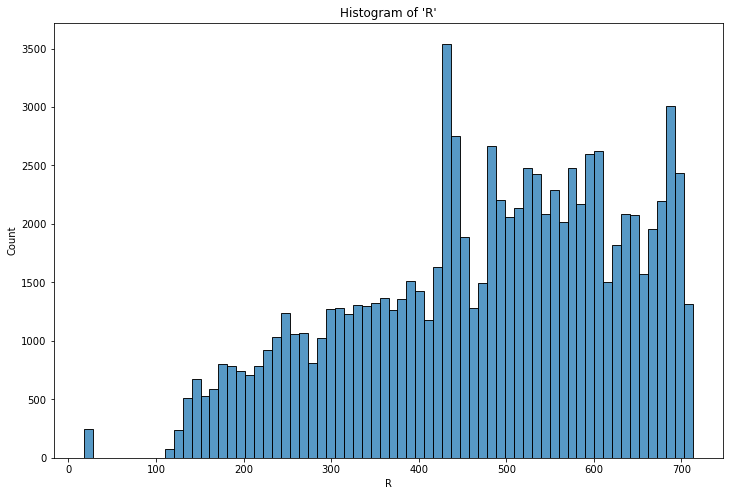

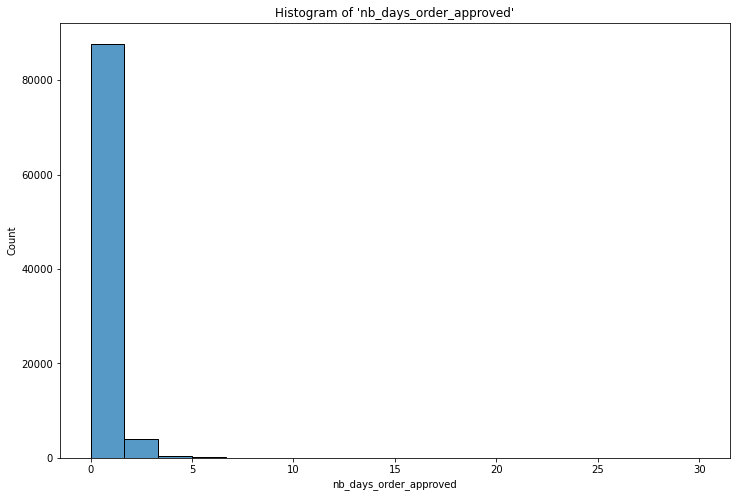

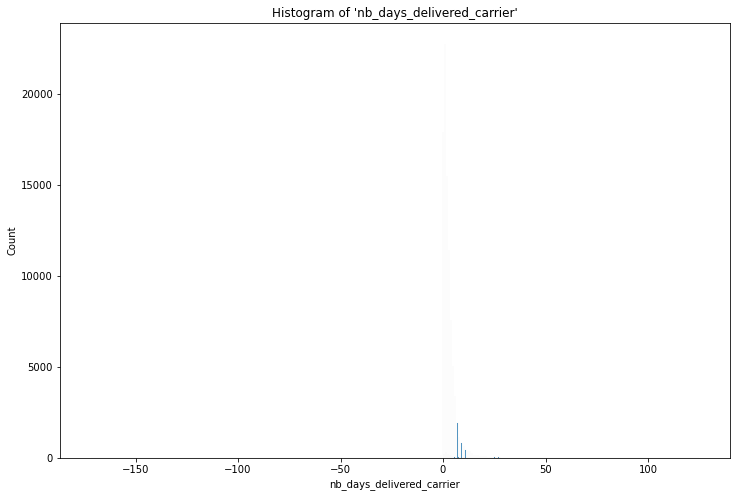

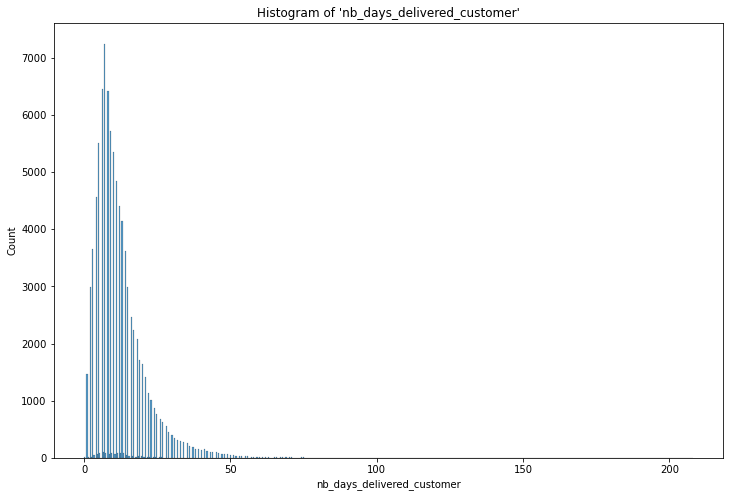

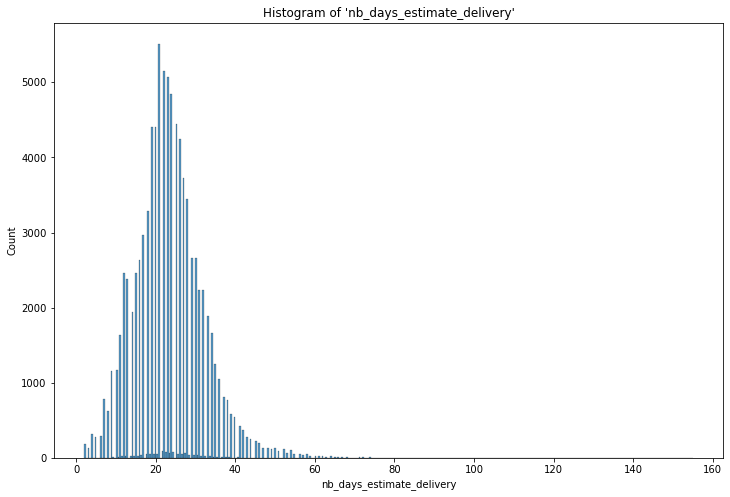

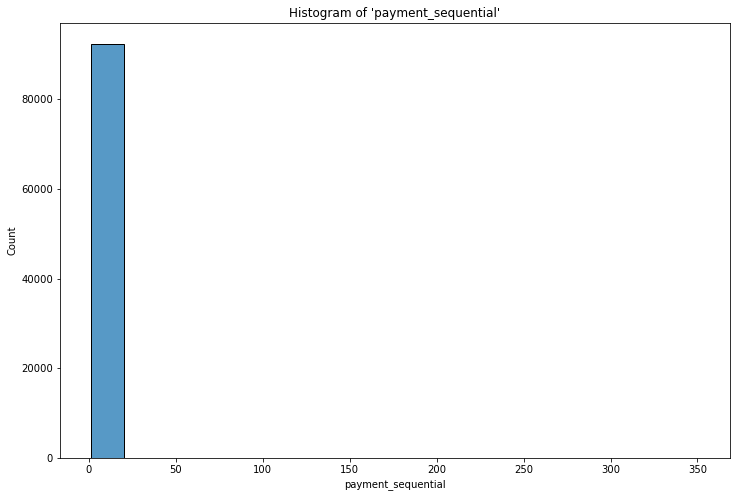

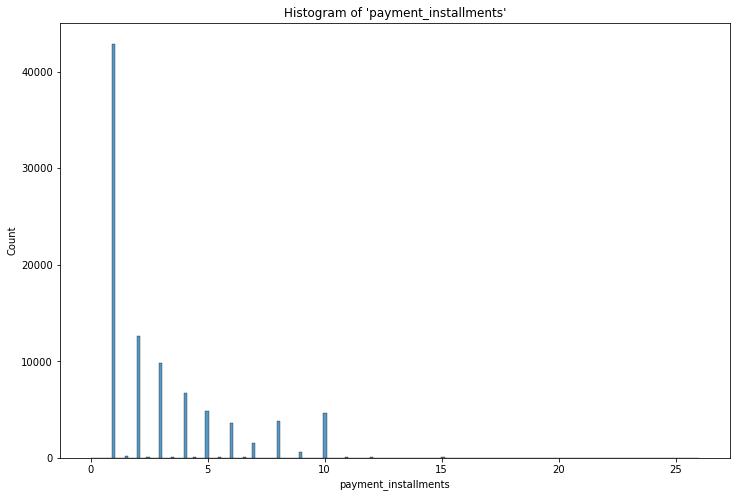

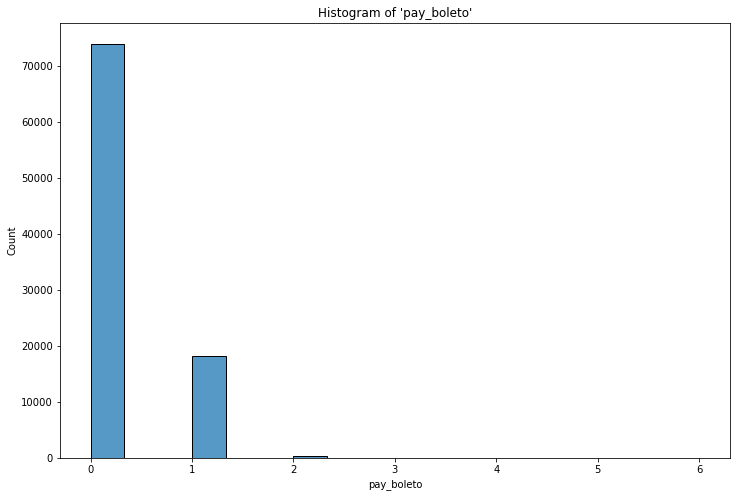

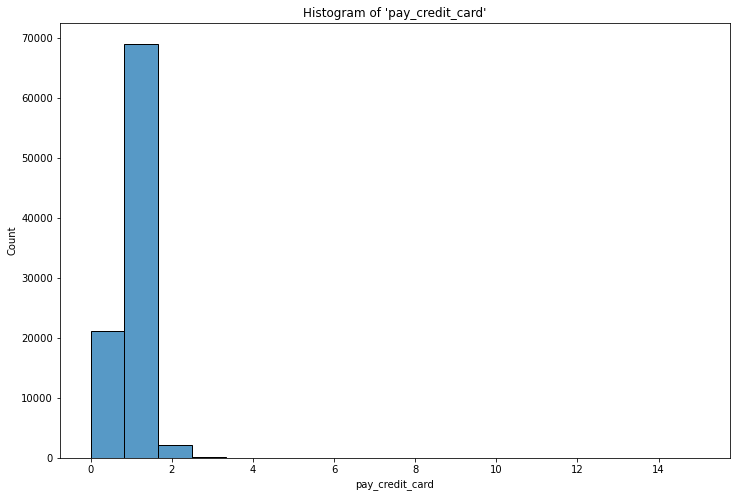

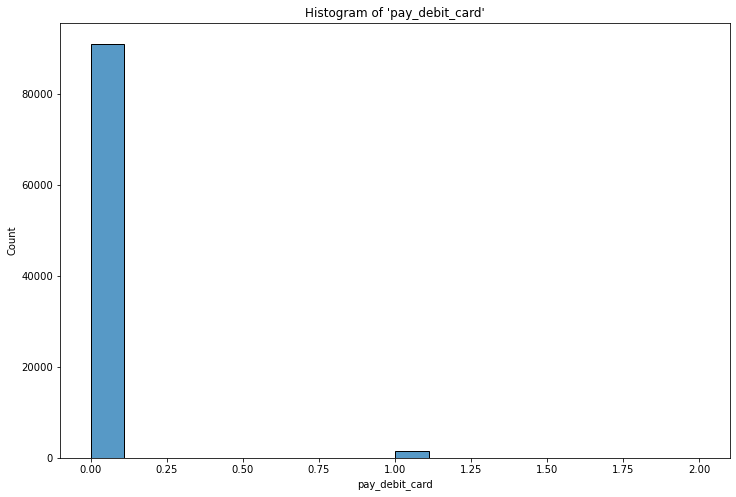

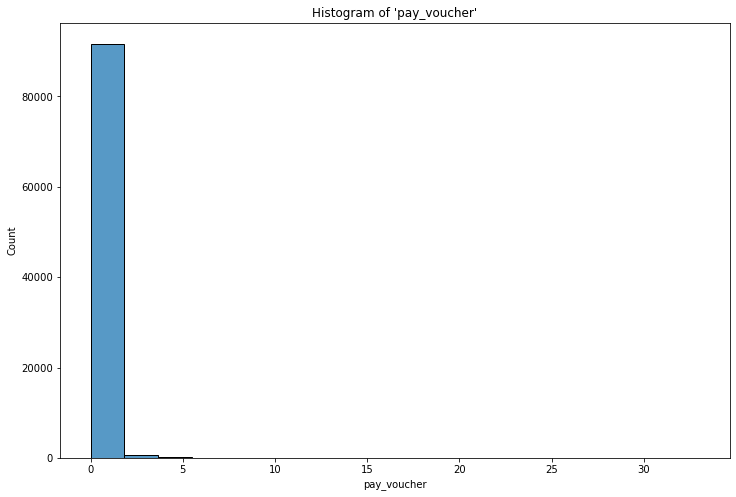

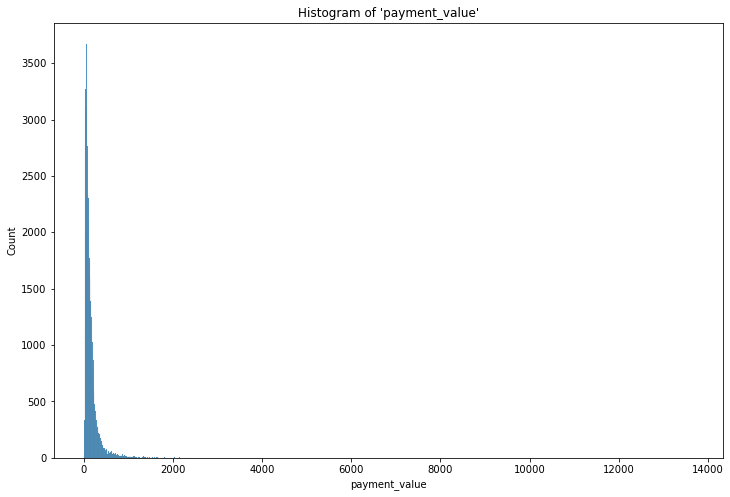

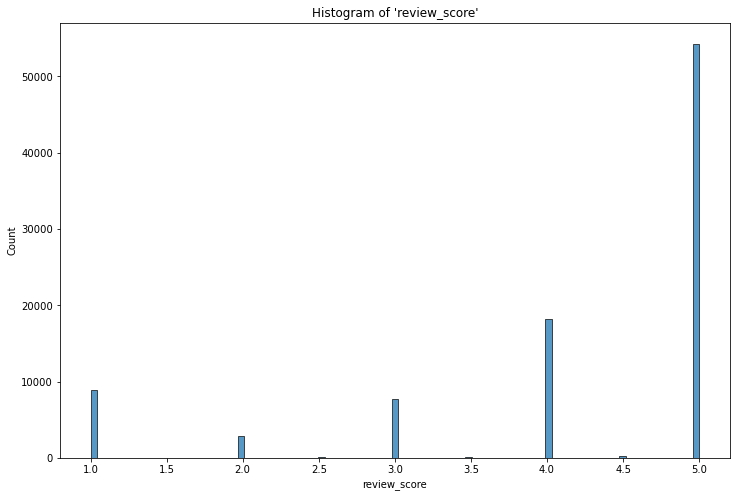

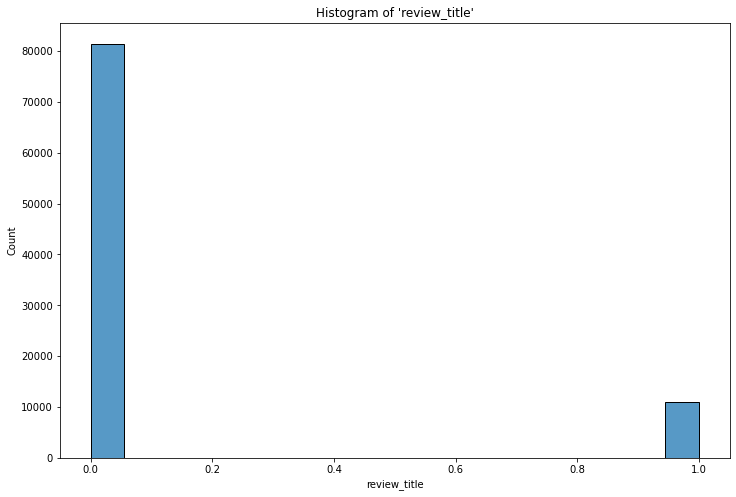

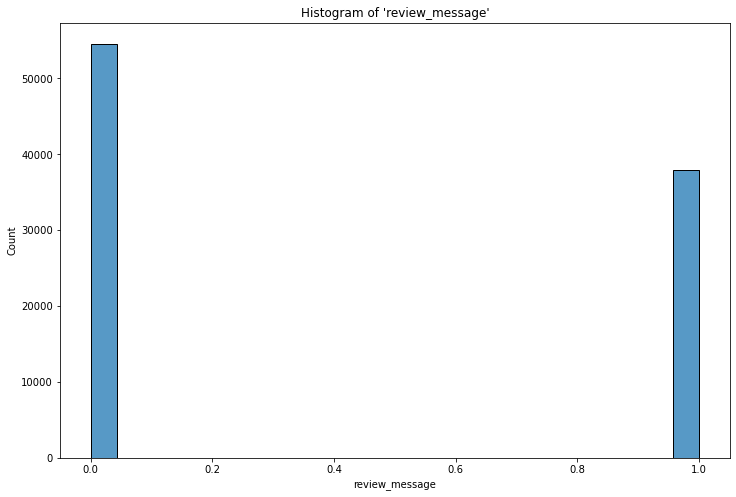

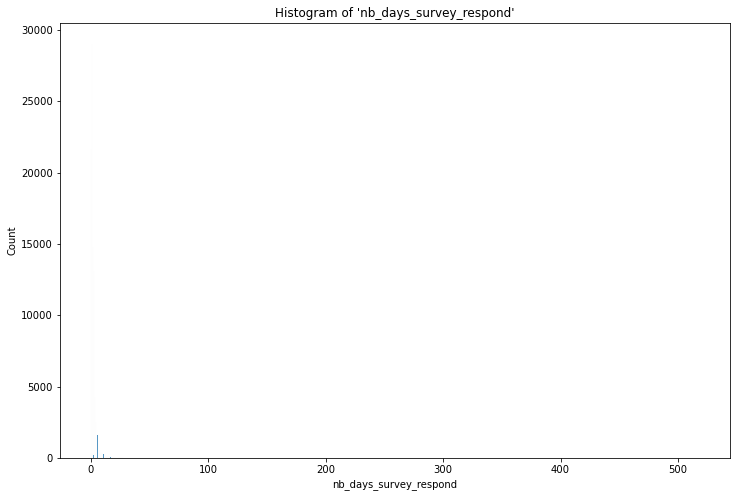

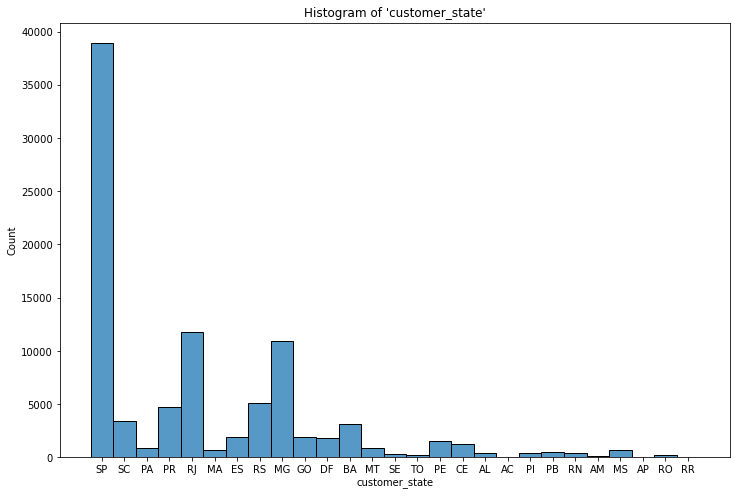

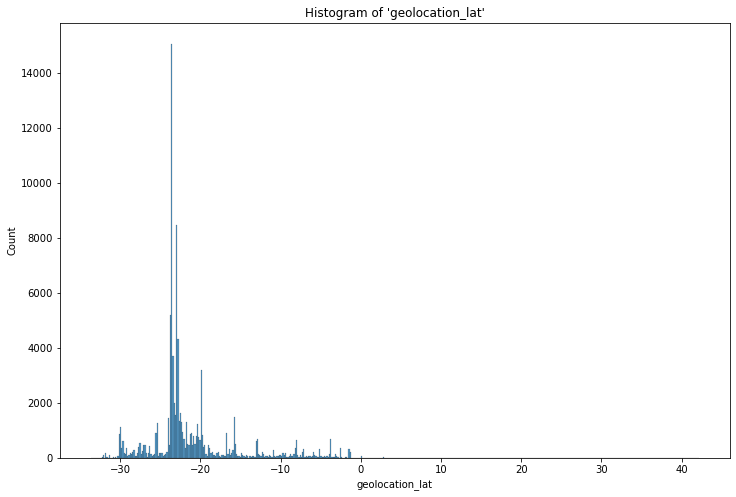

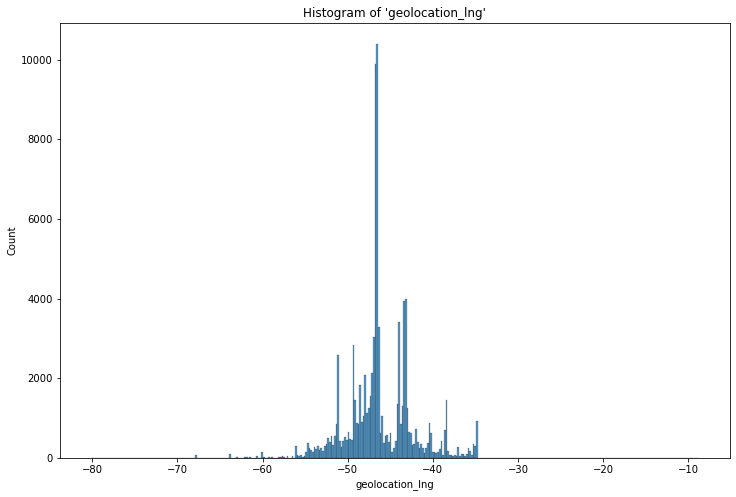

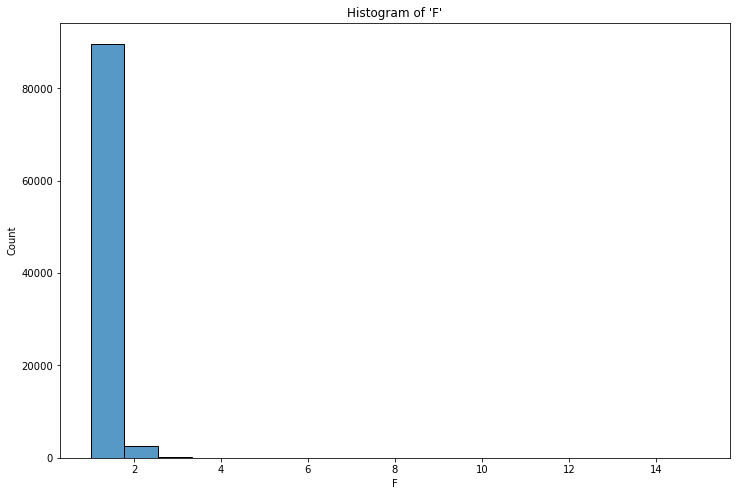

In [64]:
# histogram plot for each column 
# (except thoses with too many categories, because we don't see anything)
to_drop = ['customer_unique_id', 
           'zip_code_prefix', 
           'customer_city'
          ]

columns_to_plot = list(df.columns)
for column in to_drop:
    columns_to_plot.remove(column)

for column in columns_to_plot:
    #print(column, ':\n')
    plt.figure()
    plt.title('Histogram of \'' + column + '\'')
    sns.histplot(x=column, data=df)
    plt.show()
    print('\n'*2)

In [73]:
# negative numbers in "nb_days_delivered_carrier", 
# maybe stocks are made in advance
below_zero = df['nb_days_delivered_carrier'][df['nb_days_delivered_carrier'] < 0]
below_zero.value_counts()

-1.0      159
-0.5        2
-5.0        1
-172.0      1
Name: nb_days_delivered_carrier, dtype: int64

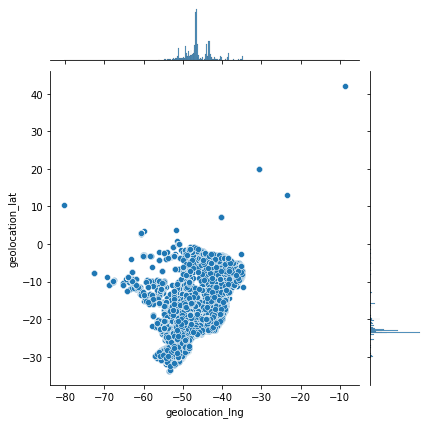

In [72]:
# gps view of unique customers
sns.jointplot(x='geolocation_lng', 
              y='geolocation_lat', 
              data=df)

In [67]:
def gps_view(df, column=None, vmax=None):
    X = df['geolocation_lng']
    Y = df['geolocation_lat']
    
    # coordinates for a good view (found by manual search)
    x_start, x_end = -70, -30
    y_start, y_end = -40, 0

    resolution_x = 1000
    img_proportion = np.array([6, 4])
    img_scale = 10

    img_size = img_proportion * img_scale
    dx = x_end - x_start
    dy = y_end - y_start
    ratio = dx/dy
    resolution_y = int(resolution_x / ratio)
    max_dist = max(dx, dy)
    X_percent = (X - x_start) / max_dist
    Y_percent = (Y - y_start) / max_dist
    X_scaled = X_percent * resolution_x
    Y_scaled = Y_percent * resolution_y


    n = max(resolution_x, resolution_y)
    heatmap = np.zeros((n, n), dtype='int')

    if column is None:
        value = 1
        
        for x, y in zip(X_scaled, Y_scaled):
            x, y = int(np.round(x)), int(resolution_y - np.round(y))
            if (x < resolution_x) and (y < resolution_y):
                heatmap[y, x] += value
            elif (x == resolution_x) and (y < resolution_y):
                heatmap[y, x-1] += value
            elif (x < resolution_x) and (y == resolution_y):
                heatmap[y-1, x] += value

    else:
        for x, y, value in zip(X_scaled, Y_scaled, df[column]):
            x, y = int(np.round(x)), int(resolution_y - np.round(y))
            if (x < resolution_x) and (y < resolution_y):
                heatmap[y, x] += value
            elif (x == resolution_x) and (y < resolution_y):
                heatmap[y, x-1] += value
            elif (x < resolution_x) and (y == resolution_y):
                heatmap[y-1, x] += value
                
    fig, ax = plt.subplots(figsize=img_size)
    sns.heatmap(heatmap, vmax=vmax)
    plt.plot()

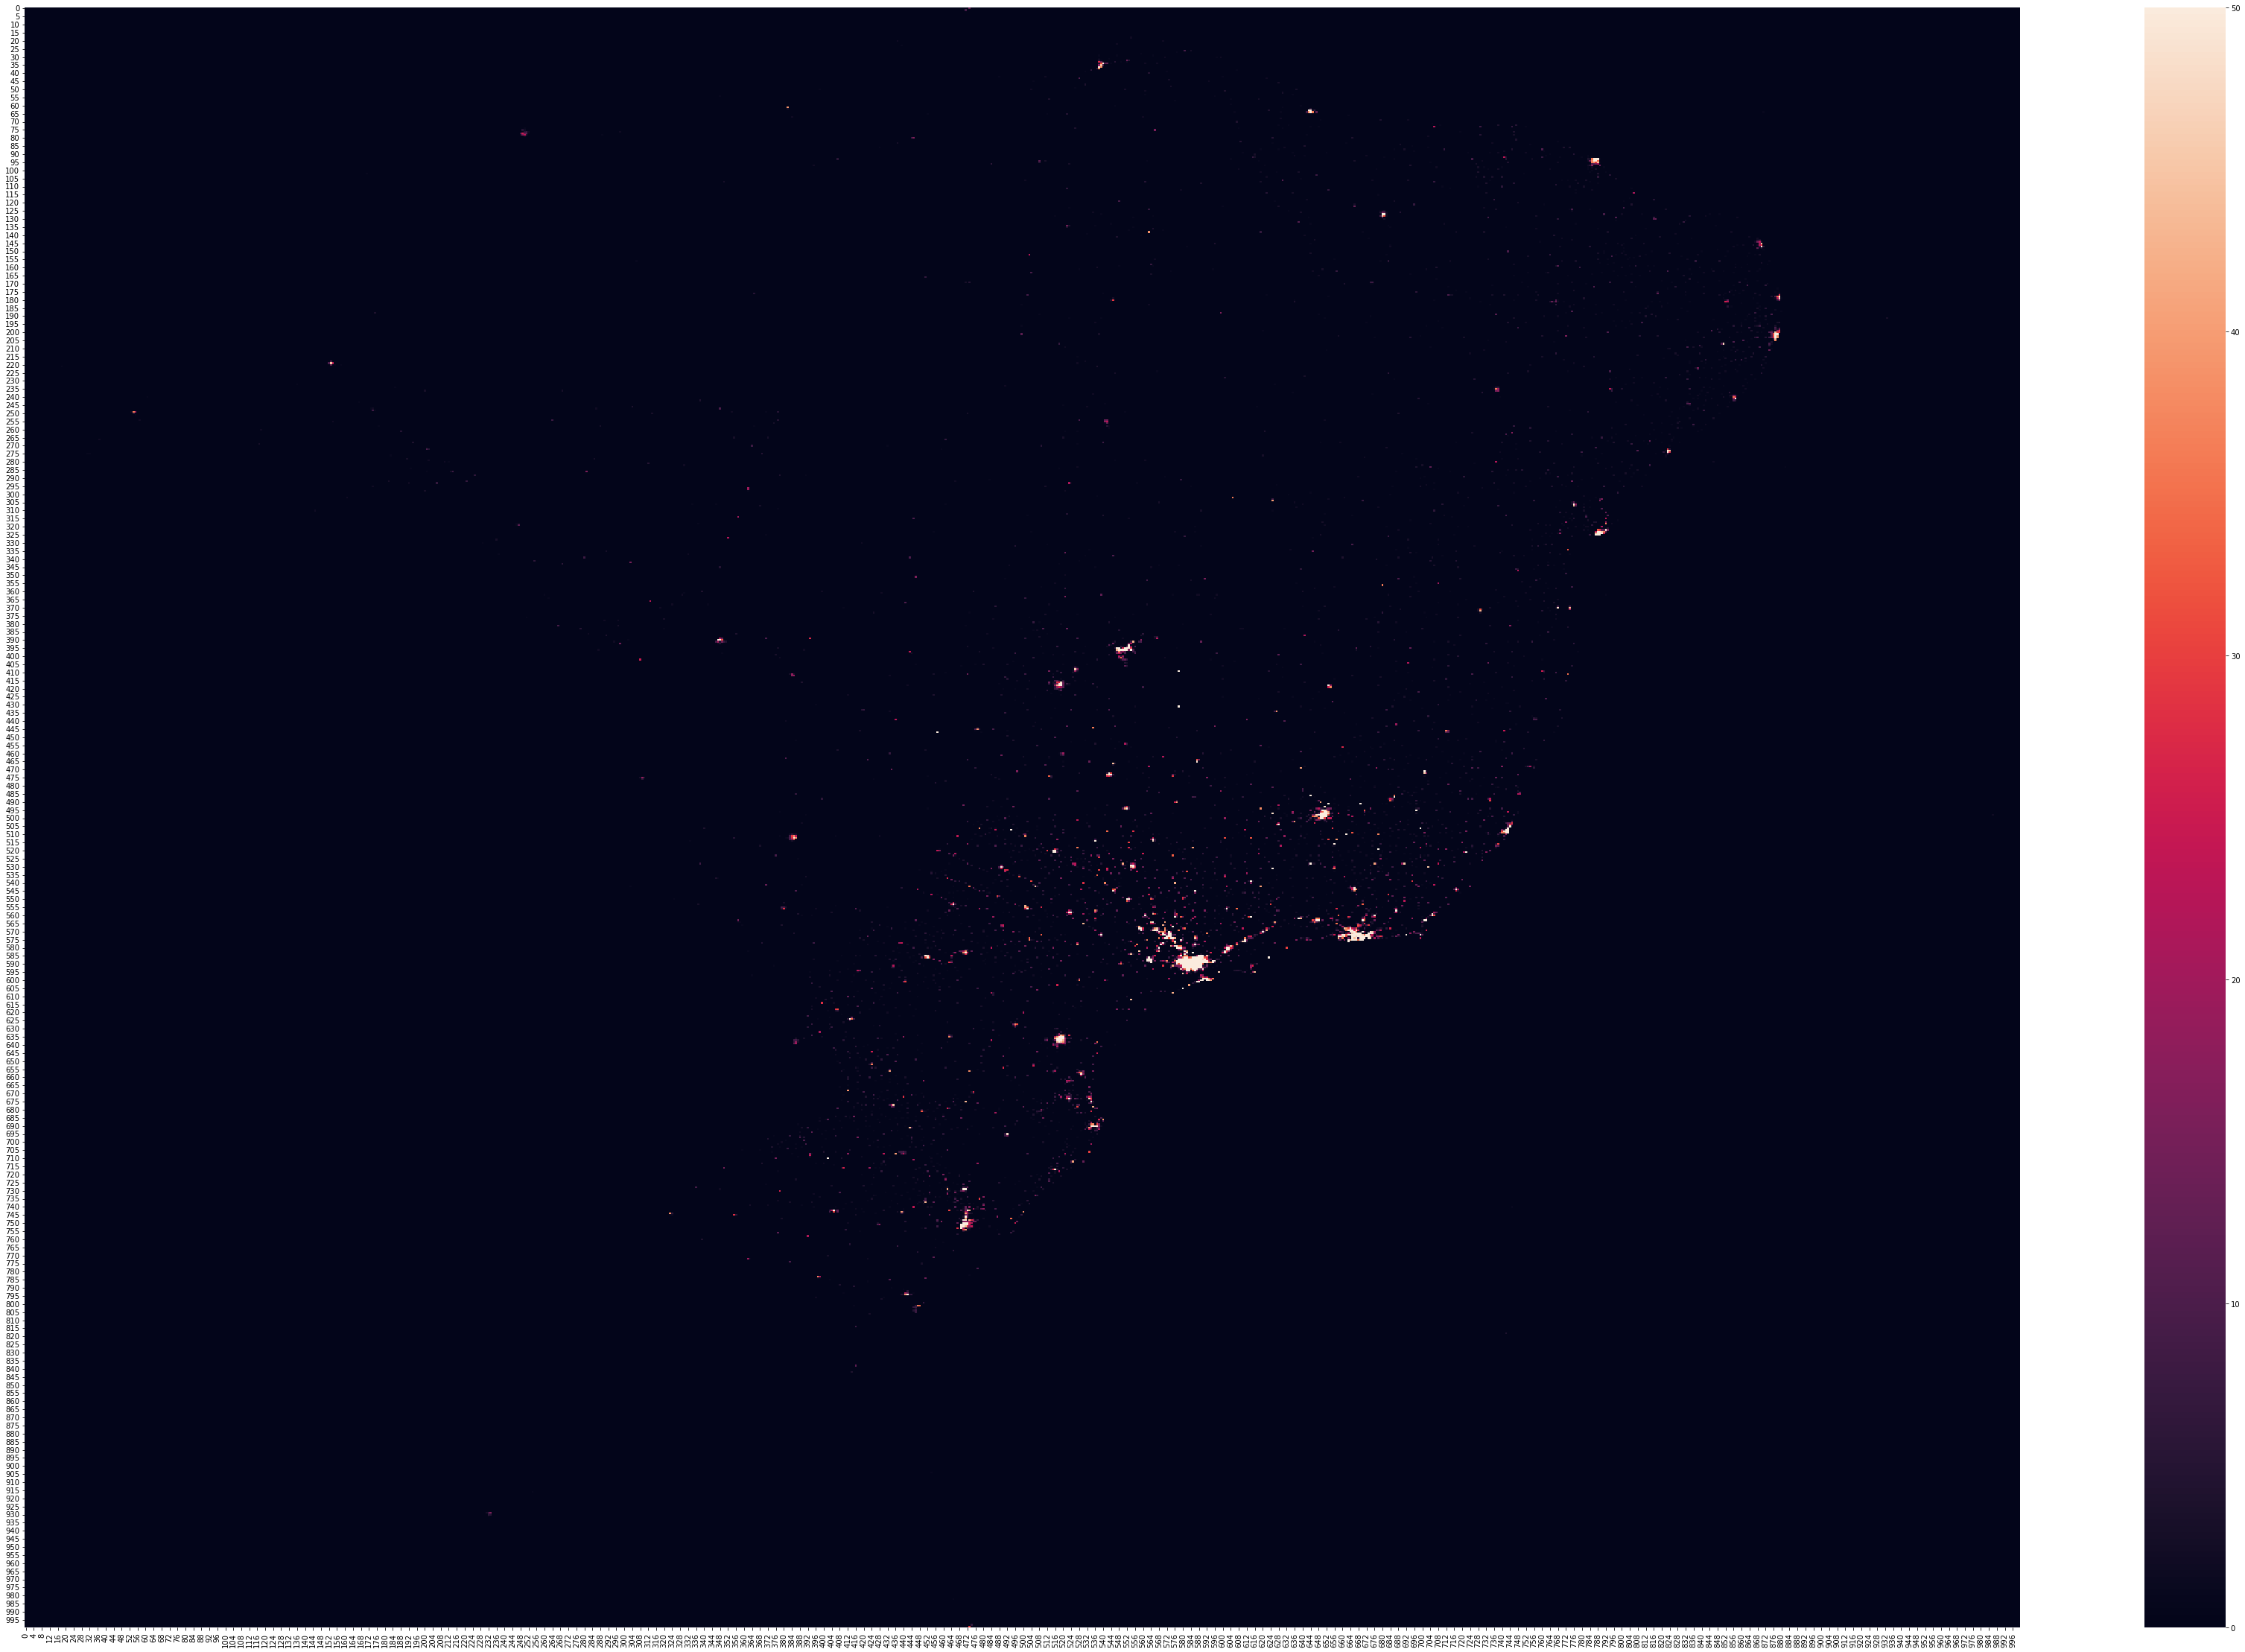

In [69]:
# client heatmap
# (we can see the shape of the brazilian east cost)
gps_view(df, column=None, vmax=50)

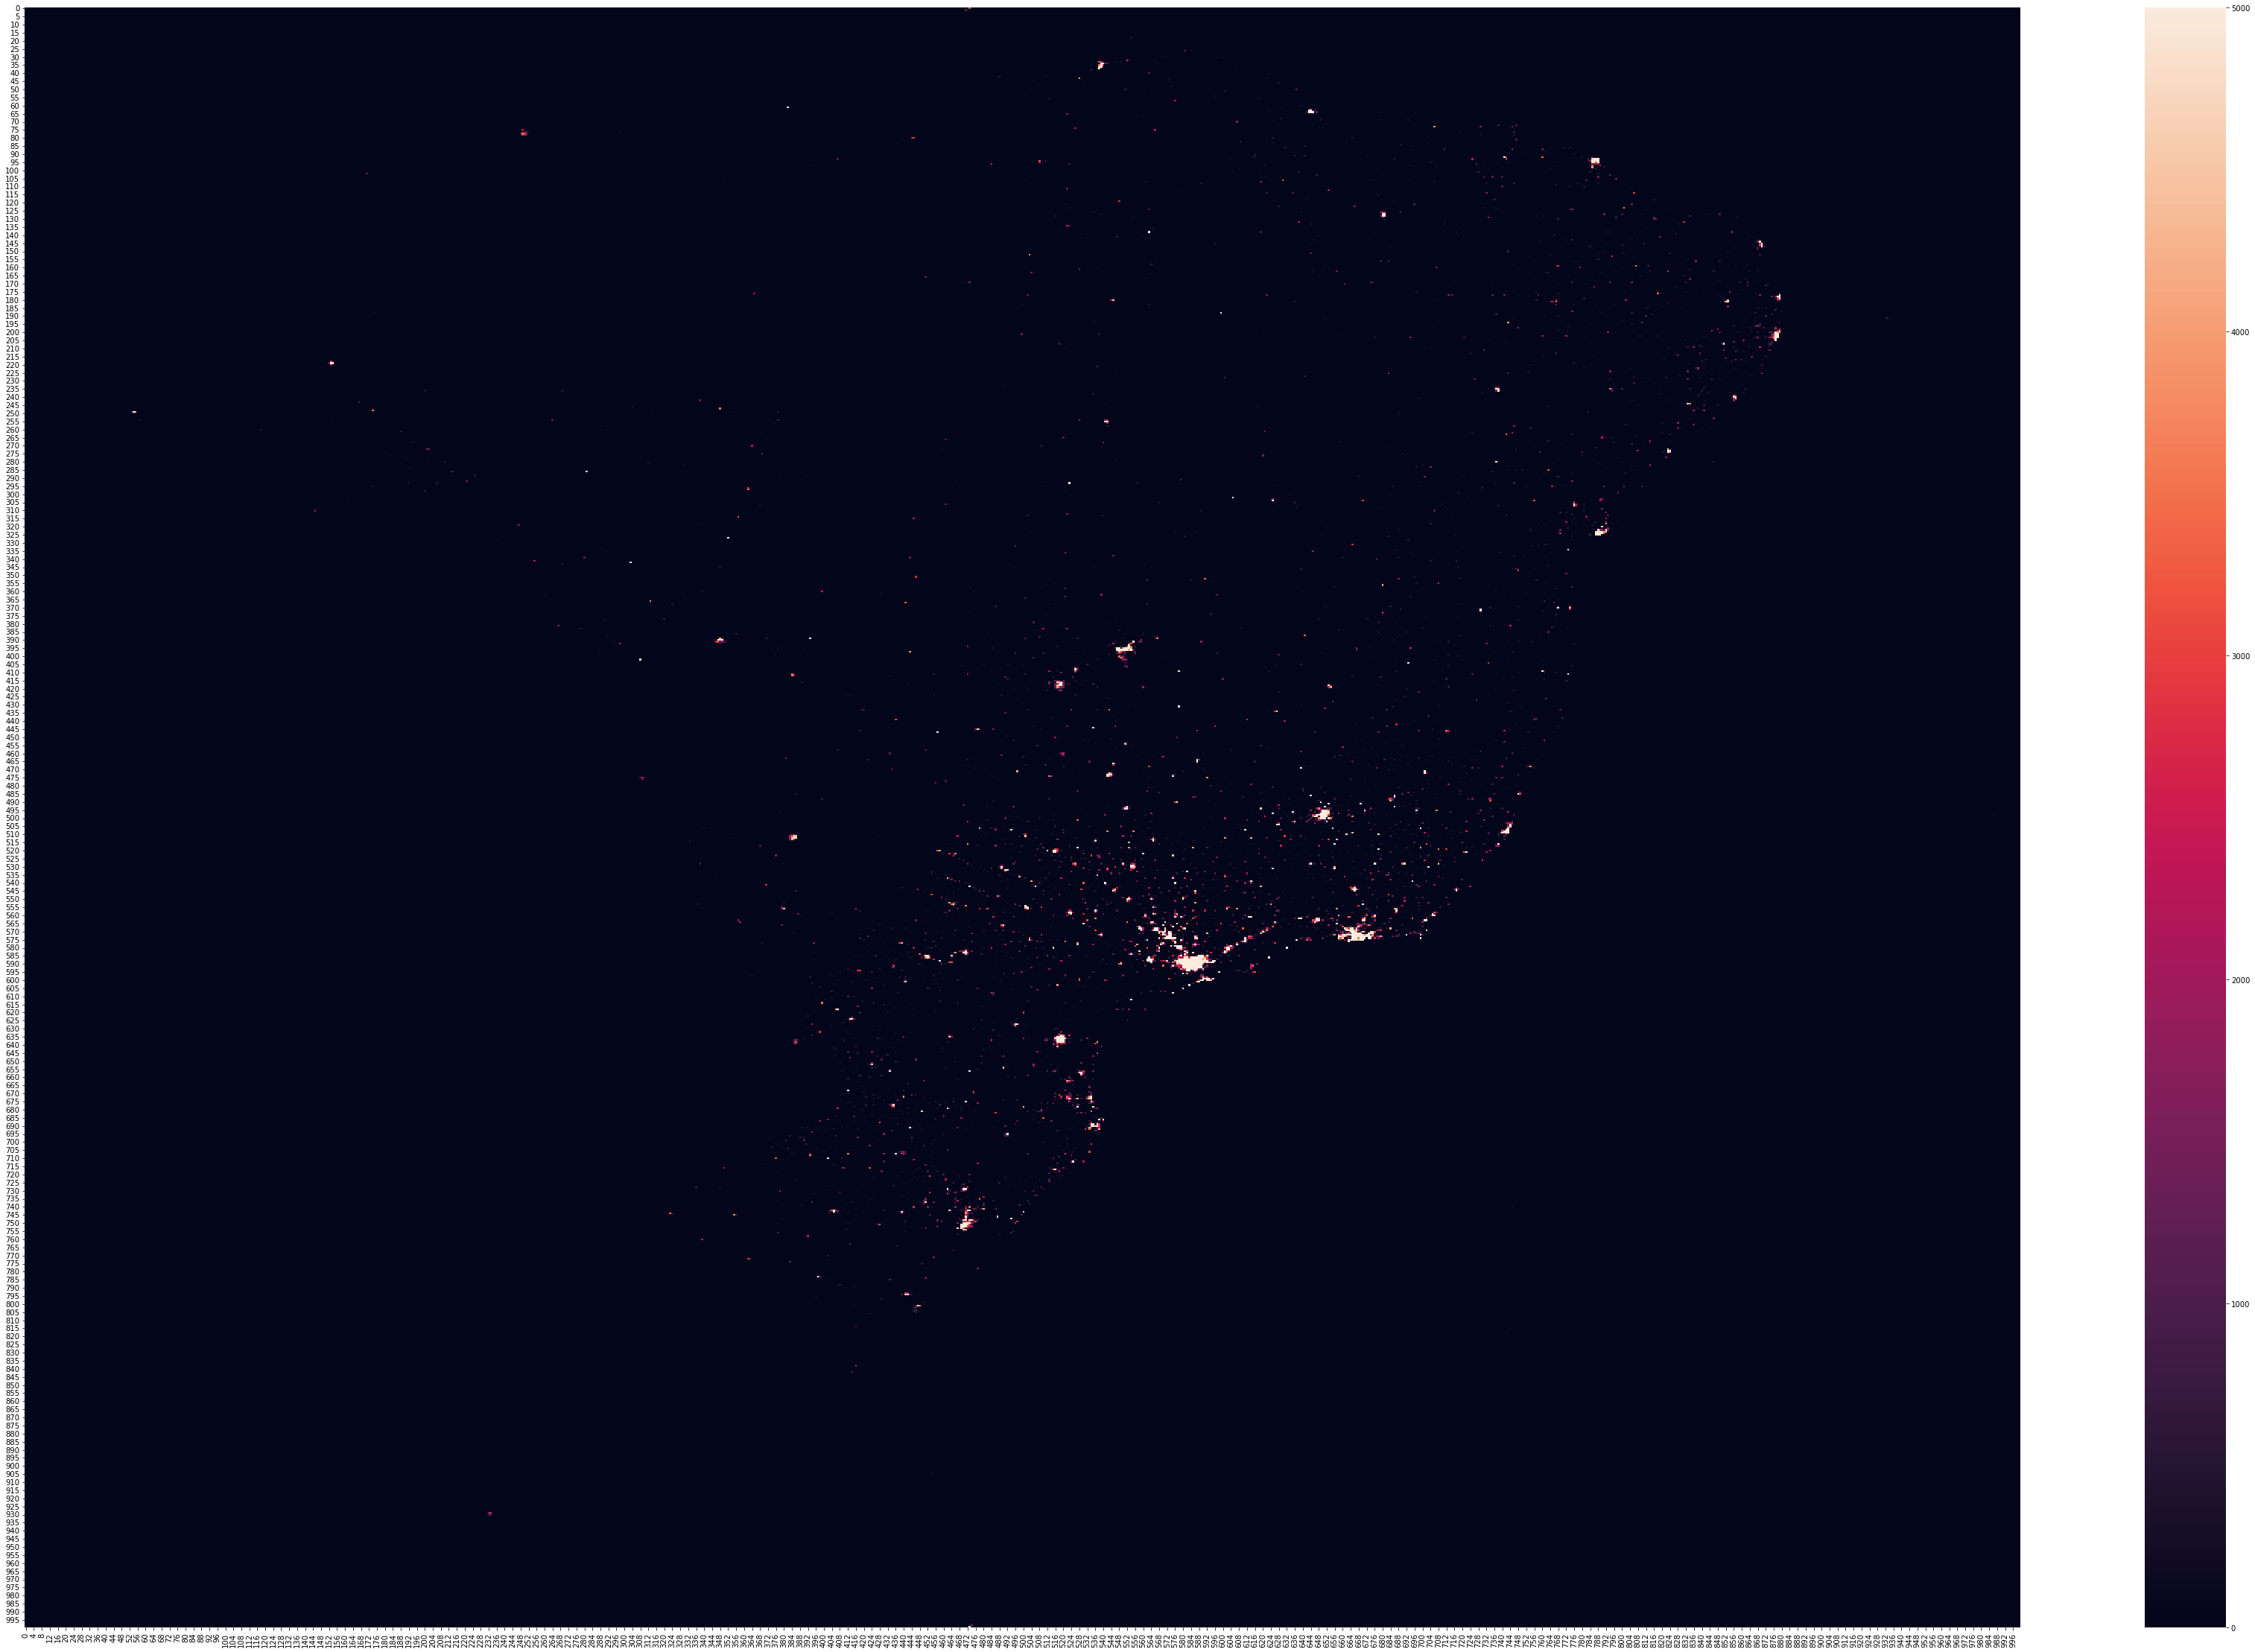

In [70]:
# revenue heatmap
# (almost same as client heatmap)
gps_view(df, column='M', vmax=5000)

The two biggest clusters are "Sao Paulo" (on the left)
                         and "Rio de Janeiro" (on the right)